In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [46]:
evolution_mapping = {
    0.0: 'Basic',
    1.0: 'Stage1',
    2.0: 'Stage2',
    3.0: 'Mega'
}

In [47]:
# Import CTGAN Synthetic data
synthetic_CTGAN = pd.read_csv("CTGAN_Pokemon.csv", encoding="UTF-8")
synthetic_CTGAN['Evolution'] = synthetic_CTGAN['Evolution'].map(evolution_mapping)
synthetic_CTGAN.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,sdv-pii-64jr8,Dragon,Psychic,13,80,68,121,26,62,4,False,Stage2
1,1,sdv-pii-xnuld,Fairy,Steel,87,157,15,29,35,107,2,False,Stage2
2,2,sdv-pii-23pgo,Ground,Electric,77,23,39,78,27,95,4,False,Stage2
3,3,sdv-pii-8mult,Bug,Water,57,134,24,68,119,106,4,False,Mega
4,4,sdv-pii-pjbi7,Fire,Ground,73,120,80,81,52,105,3,True,Stage1


In [48]:
# Import Gaussian Synthetic data
synthetic_Gaussian = pd.read_csv("Gaussian_Pokemon.csv", encoding="UTF-8")
synthetic_Gaussian['Evolution'] = synthetic_Gaussian['Evolution'].map(evolution_mapping)
synthetic_Gaussian.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,sdv-pii-64jr8,Ground,Dragon,81,93,99,88,83,71,6,False,Basic
1,1,sdv-pii-xnuld,Water,NaN,32,24,29,43,34,39,1,False,Stage1
2,2,sdv-pii-23pgo,Dark,NaN,45,28,22,35,27,71,5,False,Stage1
3,3,sdv-pii-8mult,Fire,NaN,80,101,80,135,129,64,1,False,Stage2
4,4,sdv-pii-pjbi7,Fighting,NaN,57,74,43,71,71,79,3,False,Stage1


In [49]:
# Import tensorflow Model Synthetic data
synthetic_tf = pd.read_csv("TF_Pokemon.csv", encoding="UTF-8")
synthetic_tf.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Type 1,Type 2,Evolution,Total
0,45.0,47.0,43.0,41.0,44.0,46.0,False,6,Normal,Fighting,Stage1,266.0
1,44.0,47.0,43.0,40.0,44.0,39.0,False,6,Flying,Dark,Basic,257.0
2,44.0,47.0,43.0,40.0,44.0,39.0,False,2,Dark,Electric,Basic,257.0
3,95.0,111.0,105.0,106.0,100.0,97.0,True,5,)Normal,Bug,Stage2,614.0
4,95.0,111.0,105.0,106.0,100.0,97.0,True,5,Grass,Bug,Stage2,614.0


In [50]:
# Import real data
df = pd.read_csv("data\\pokemon_train_set.csv")
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Basic
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Stage1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Stage2
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Mega
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Basic


In [51]:
# Adding Total column for real and synthetic data
df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_CTGAN
synthetic_CTGAN['Total'] = synthetic_CTGAN[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_tf
synthetic_tf['Total'] = synthetic_tf[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
synthetic_Gaussian['Total'] = synthetic_Gaussian[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

In [85]:
df_std = df.std(numeric_only=True)
synthetic_std = synthetic_tf.std(numeric_only=True)
gaussian_std = synthetic_Gaussian.std(numeric_only=True)
ctgan_std = synthetic_CTGAN.std(numeric_only=True)
std_df = pd.DataFrame({
    'Real': df_std,
    'Synthetic_TF': synthetic_std,
    'Synthetic_Gaussian': gaussian_std,
    'Synthetic_CTGAN': ctgan_std
})
std_df = std_df.drop("Unnamed: 0", axis=0)

mean_df = pd.DataFrame({
    'Real': df.mean(numeric_only=True),
    'Synthetic_TF': synthetic_tf.mean(numeric_only=True),
    'Synthetic_Gaussian': synthetic_Gaussian.mean(numeric_only=True),
    'Synthetic_CTGAN': synthetic_CTGAN.mean(numeric_only=True)
})
median_df = mean_df.drop("Unnamed: 0", axis=0)

combined_df = pd.concat([std_df.add_suffix('_std'), mean_df.add_suffix('_median')], axis=1)

In [83]:
def plot_attribute_std_and_median(attribute_name, data_frame):
    """
    Plots the standard deviations and medians of a specified attribute from different datasets side by side.

    Args:
    attribute_name (str): The name of the attribute to plot.
    data_frame (pd.DataFrame): DataFrame containing the standard deviations and medians.
    """
    attribute_std = data_frame[[col for col in data_frame.columns if 'std' in col]].loc[attribute_name]
    attribute_median = data_frame[[col for col in data_frame.columns if 'median' in col]].loc[attribute_name]
    n_pairs = len(attribute_std)
    plt.figure(figsize=(10, 6))
    r = range(n_pairs)
    width = 0.4
    plt.bar(r, attribute_std, color='skyblue', width=width, edgecolor='white', label='Standard Deviation')
    plt.bar([x + width for x in r], attribute_median, color='red', width=width, edgecolor='white', label='Mean')
    plt.xlabel('Dataset', fontweight='bold')
    plt.xticks([r + width for r in range(n_pairs)], attribute_std.index, rotation=45)
    plt.ylabel(f'{attribute_name} Value')
    plt.title(f'{attribute_name} Standard Deviations and Medians Across Different Datasets')
    plt.legend()
    plt.show()

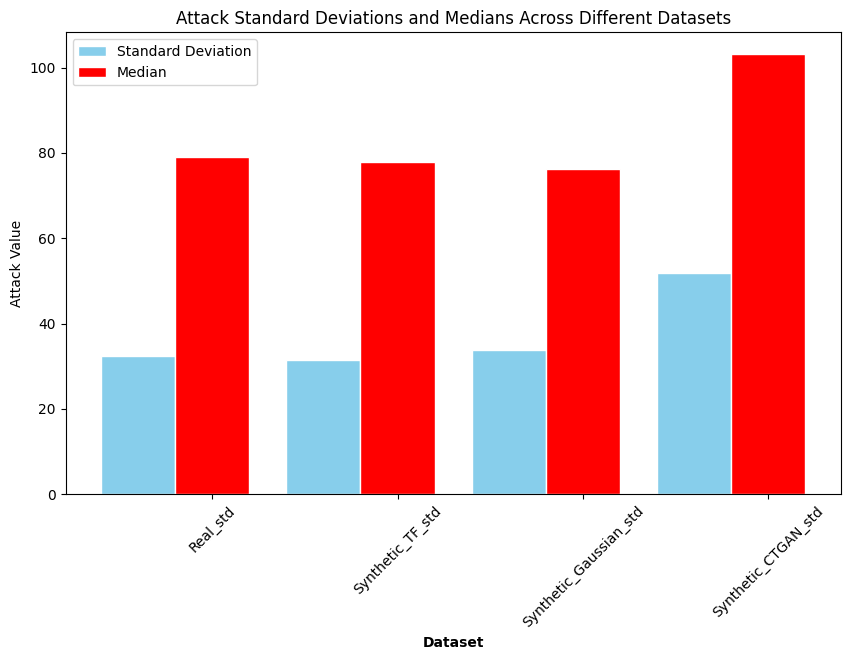

In [86]:
plot_attribute_std_and_median('Attack', combined_df)

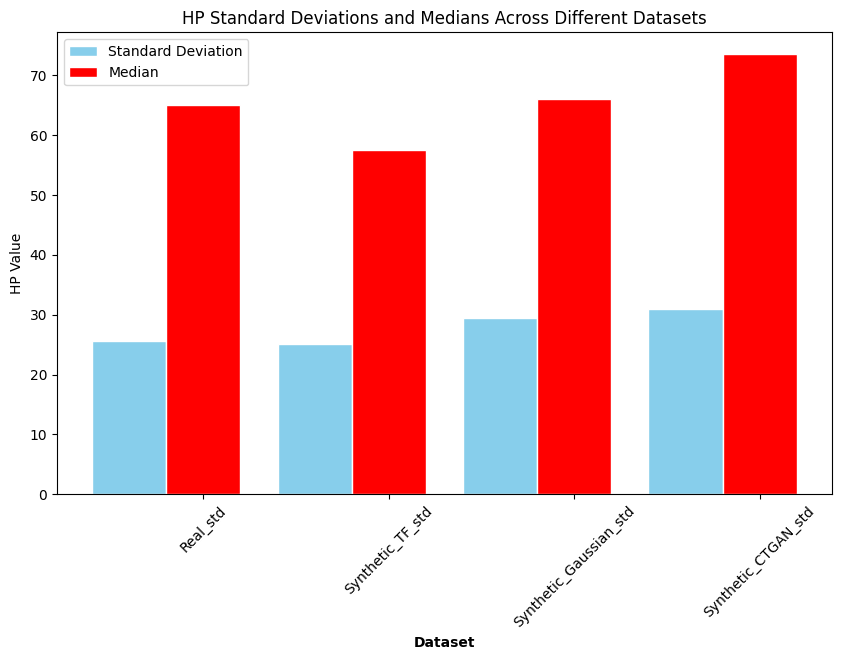

In [71]:
plot_attribute_std_and_median('HP', combined_df)

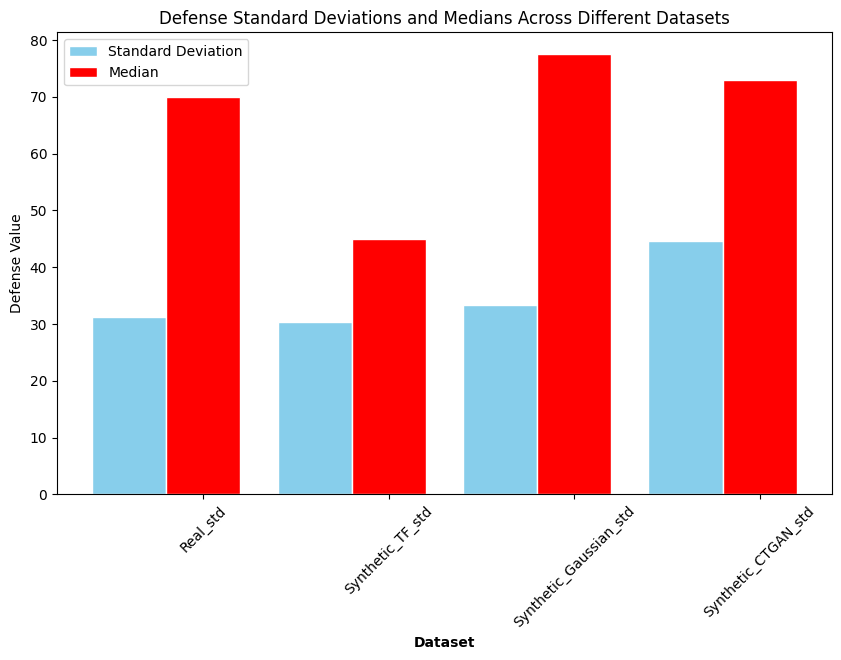

In [72]:
plot_attribute_std_and_median('Defense', combined_df)

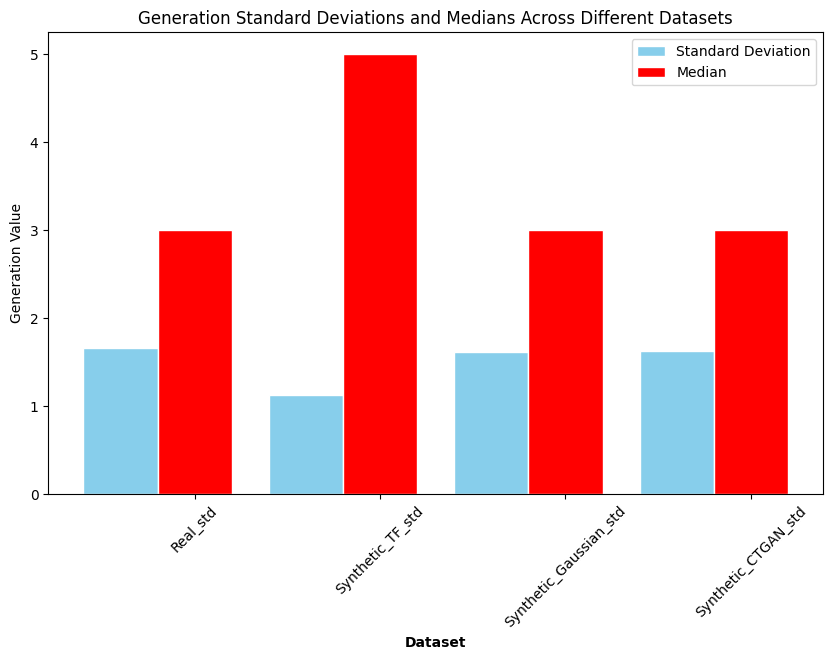

In [80]:
plot_attribute_std_and_median('Generation', combined_df)

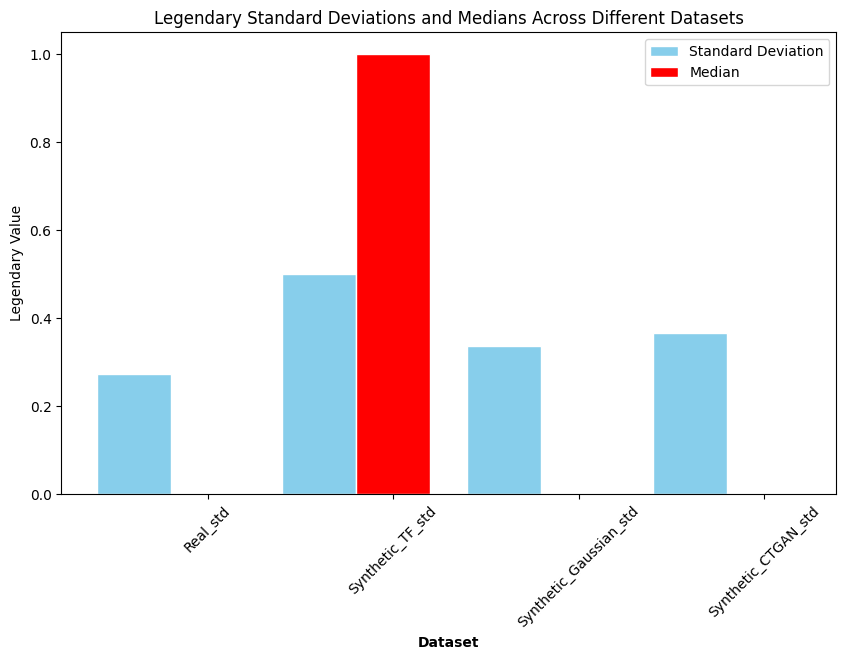

In [81]:
plot_attribute_std_and_median('Legendary', combined_df)

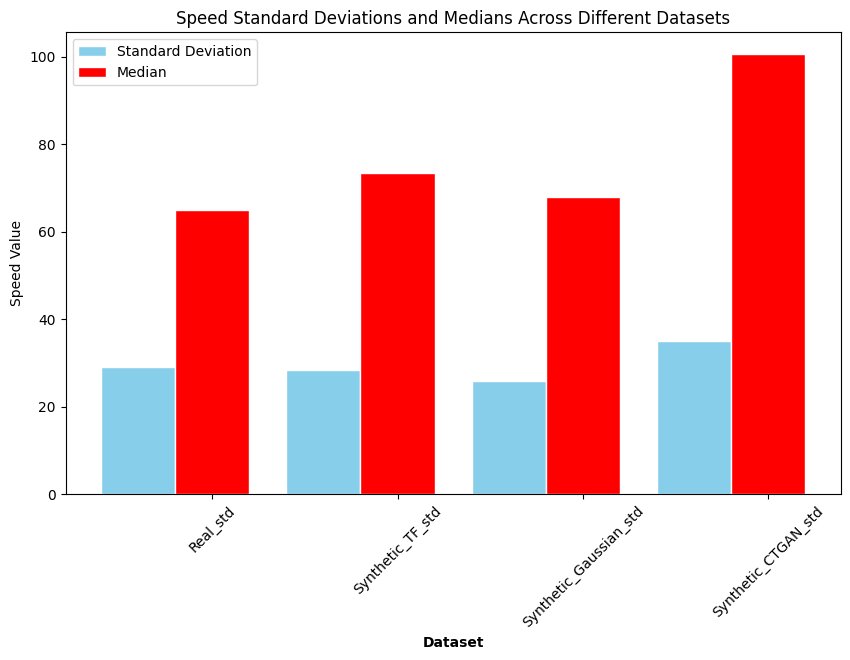

In [74]:
plot_attribute_std_and_median('Speed', combined_df)

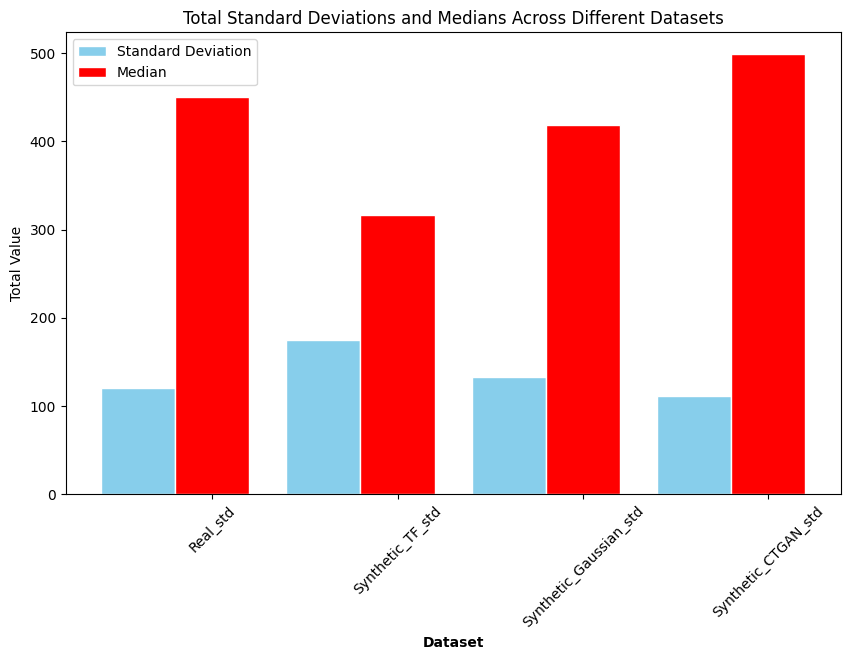

In [75]:
plot_attribute_std_and_median('Total', combined_df)

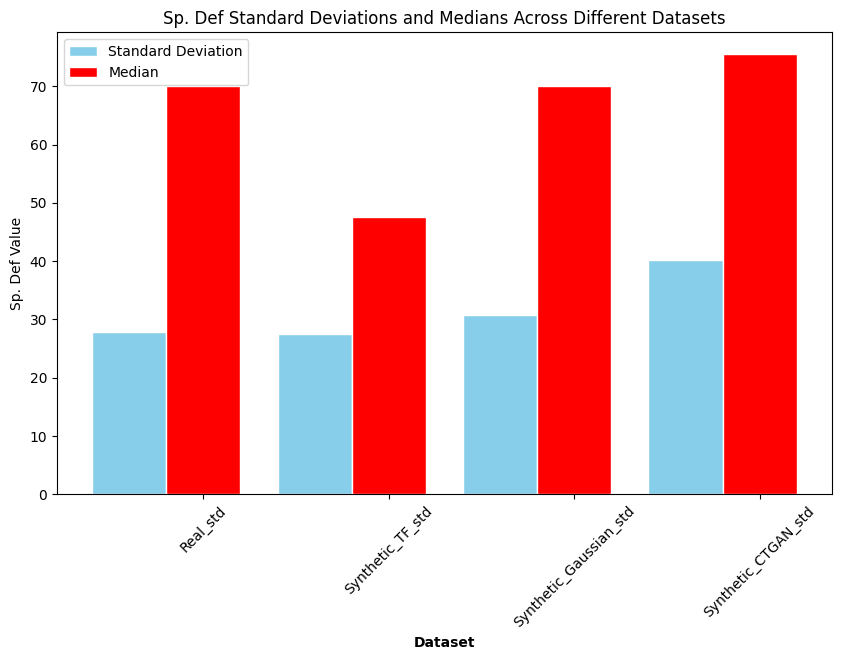

In [76]:
plot_attribute_std_and_median('Sp. Def', combined_df)

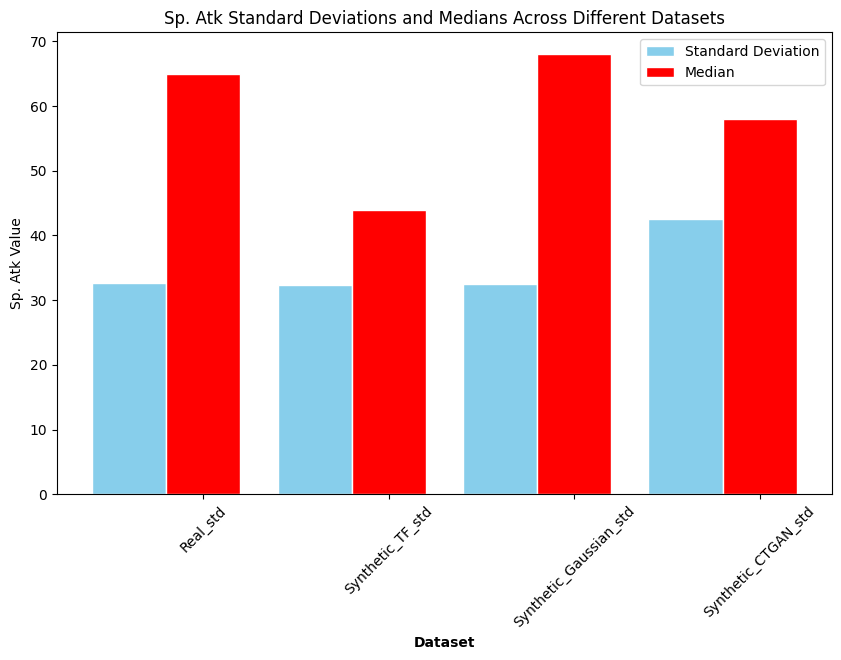

In [77]:
plot_attribute_std_and_median('Sp. Atk', combined_df)

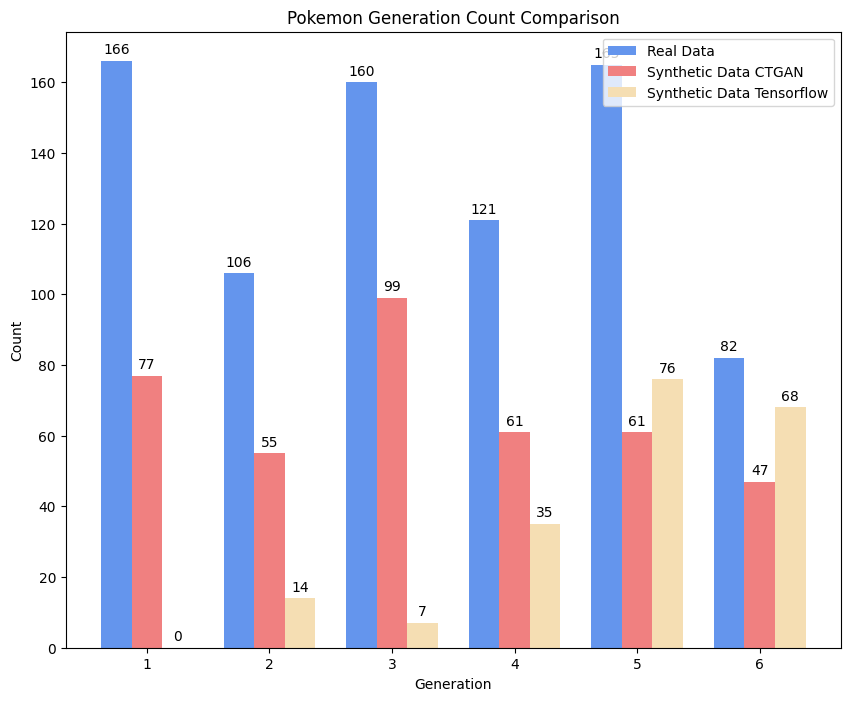

In [63]:
# Generate the counts for each type of data
generation_count_real = df['Generation'].value_counts().sort_index()
generation_count_synthetic = synthetic_CTGAN['Generation'].value_counts().sort_index()
generation_count_synthetic_tf = synthetic_tf['Generation'].value_counts().sort_index()

# Get a sorted union of all unique generations present in the data
all_generations = sorted(set(generation_count_real.index).union(
    set(generation_count_synthetic.index), set(generation_count_synthetic_tf.index)))

# Reindex the counts to include all generations, filling missing values with 0
generation_count_real = generation_count_real.reindex(all_generations, fill_value=0)
generation_count_synthetic = generation_count_synthetic.reindex(all_generations, fill_value=0)
generation_count_synthetic_tf = generation_count_synthetic_tf.reindex(all_generations, fill_value=0)

# Set the width of each bar
bar_width = 0.8

# Define the positions of the bars
index = np.arange(len(all_generations)) * (bar_width * 4)



# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, generation_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, generation_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, generation_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars)
add_labels(ctgan_bars)
add_labels(tf_bars)

# Add title and axis labels
plt.title('Pokemon Generation Count Comparison')
plt.xlabel('Generation')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width, all_generations)

# Add a legend
plt.legend()

# Show the plot
plt.show()


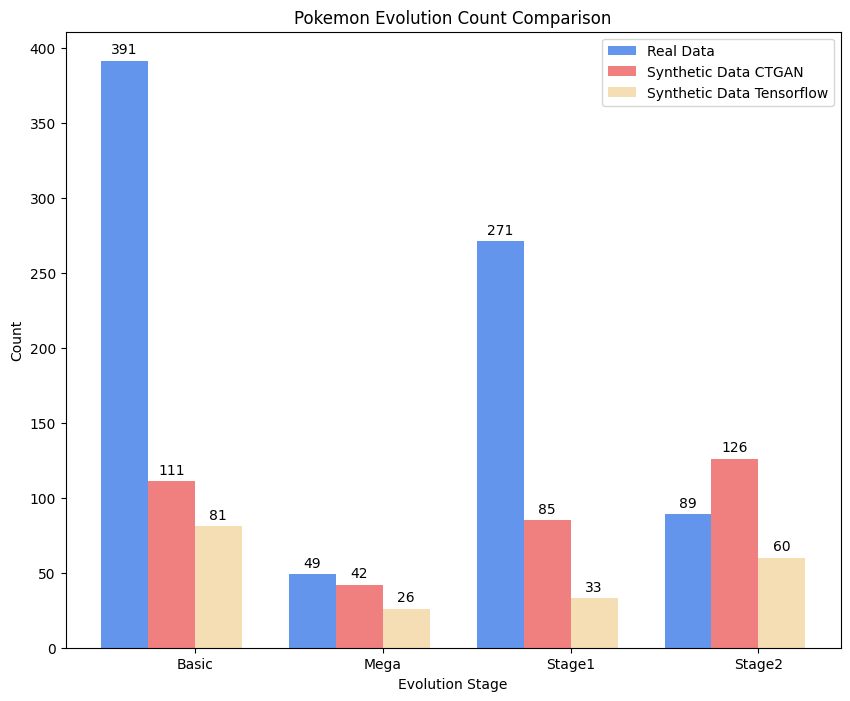

In [64]:
# Generate the counts for each type of data
evolution_count_real = df['Evolution'].value_counts().sort_index()
evolution_count_synthetic = synthetic_CTGAN['Evolution'].value_counts().sort_index()
evolution_count_synthetic_tf = synthetic_tf['Evolution'].value_counts().sort_index()

# Get a sorted union of all unique evolution stages present in the data
all_evolutions = sorted(set(evolution_count_real.index).union(set(evolution_count_synthetic.index), set(evolution_count_synthetic_tf.index)))

# Reindex the counts to include all evolution stages, filling missing values with 0
evolution_count_real = evolution_count_real.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic = evolution_count_synthetic.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic_tf = evolution_count_synthetic_tf.reindex(all_evolutions, fill_value=0)

# Define the positions of the bars
index = np.arange(len(all_evolutions)) * (bar_width * 4)

# Set the width of each bar
bar_width = 0.8

# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, evolution_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, evolution_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, evolution_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars, offset):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + offset, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars, bar_width / 2)
add_labels(ctgan_bars, bar_width / 2)
add_labels(tf_bars, bar_width /2)

# Add title and axis labels
plt.title('Pokemon Evolution Count Comparison')
plt.xlabel('Evolution Stage')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width * 1.5, all_evolutions)

# Add a legend
plt.legend()

# Show the plot
plt.show()


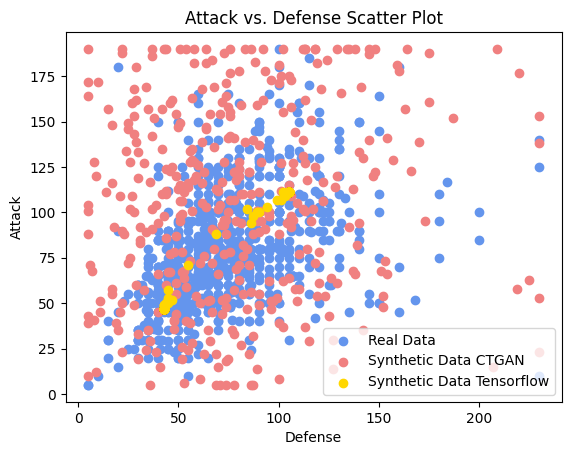

In [65]:
# Scatterplot for real data
plt.scatter(df['Defense'], df['Attack'], color='cornflowerblue', label='Real Data')

# Scatterplot for for synthetic data CTGAN
plt.scatter(synthetic_CTGAN['Defense'], synthetic_CTGAN['Attack'], color='lightcoral', label='Synthetic Data CTGAN')

# Scatterplot for synthetic data tf
plt.scatter(synthetic_tf['Defense'], synthetic_tf['Attack'], color='gold', label='Synthetic Data Tensorflow')

# Add title and axis lable
plt.title('Attack vs. Defense Scatter Plot')
plt.xlabel('Defense')
plt.ylabel('Attack')

# Add legend
plt.legend()

# Show diagram
plt.show()


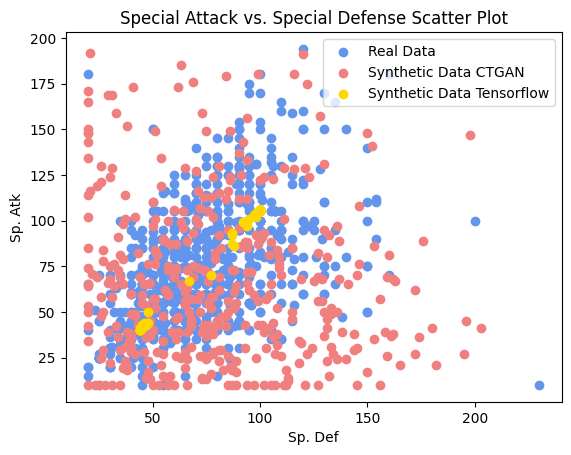

In [66]:
# Scatterplot for real data
plt.scatter(df['Sp. Def'], df['Sp. Atk'], color='cornflowerblue', label='Real Data')

# Scatterplot for synthetic data CTGAN
plt.scatter(synthetic_CTGAN['Sp. Def'], synthetic_CTGAN['Sp. Atk'], color='lightcoral', label='Synthetic Data CTGAN')

# Scatterplot for synthetic data tf
plt.scatter(synthetic_tf['Sp. Def'], synthetic_tf['Sp. Atk'], color='gold', label='Synthetic Data Tensorflow')

# Add title and axis lables
plt.title('Special Attack vs. Special Defense Scatter Plot')
plt.xlabel('Sp. Def')
plt.ylabel('Sp. Atk')

# Add lengend
plt.legend()

# Add diagram
plt.show()


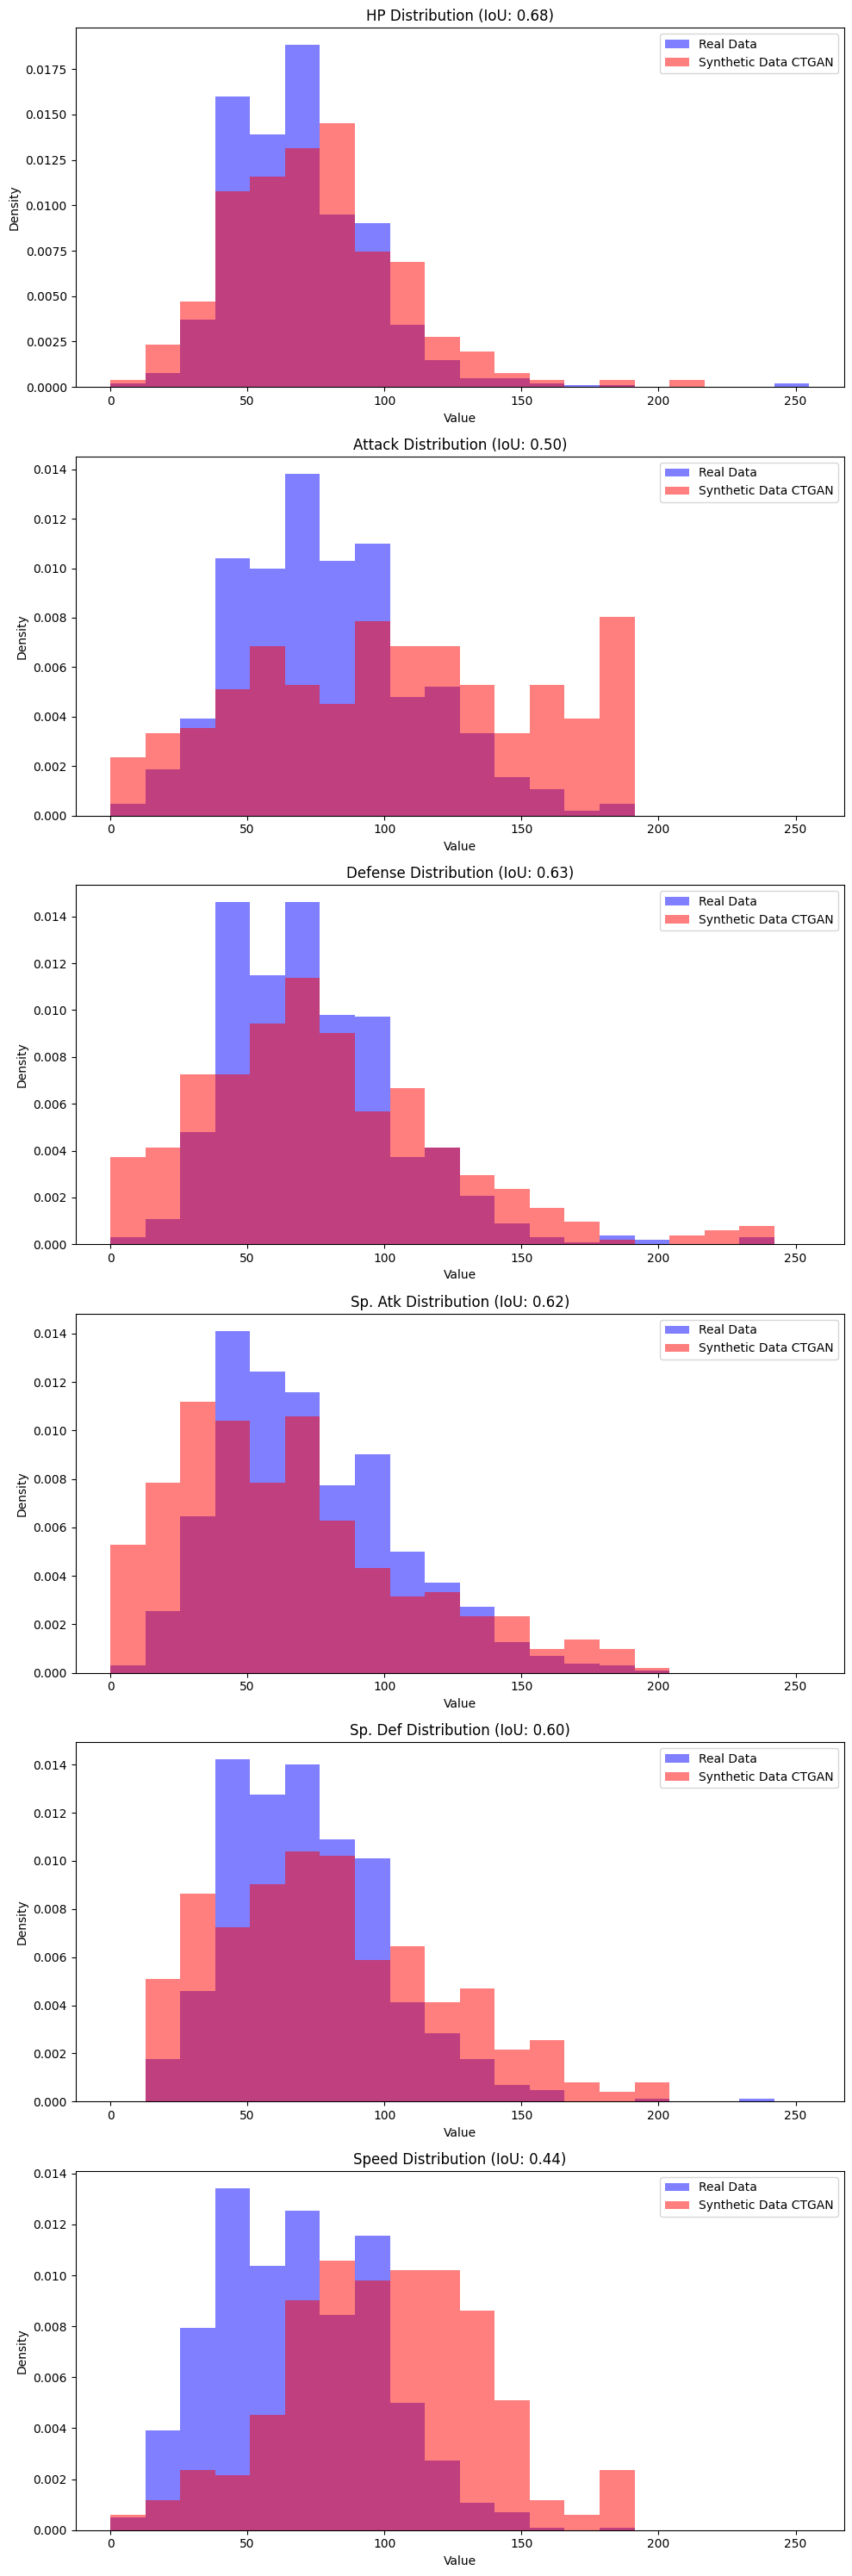

IoU for HP: 0.68
IoU for Attack: 0.50
IoU for Defense: 0.63
IoU for Sp. Atk: 0.62
IoU for Sp. Def: 0.60
IoU for Speed: 0.44


In [67]:
#CTGAN
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_CTGAN[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_CTGAN_numeric = synthetic_CTGAN[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_CTGAN_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_CTGAN_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_CTGAN_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


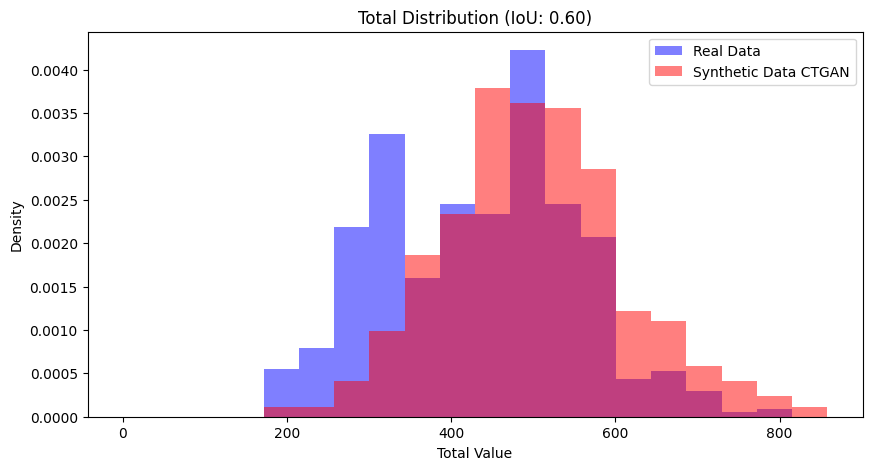

IoU for Total: 0.60


In [68]:
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_CTGAN["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_CTGAN["Total"], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')


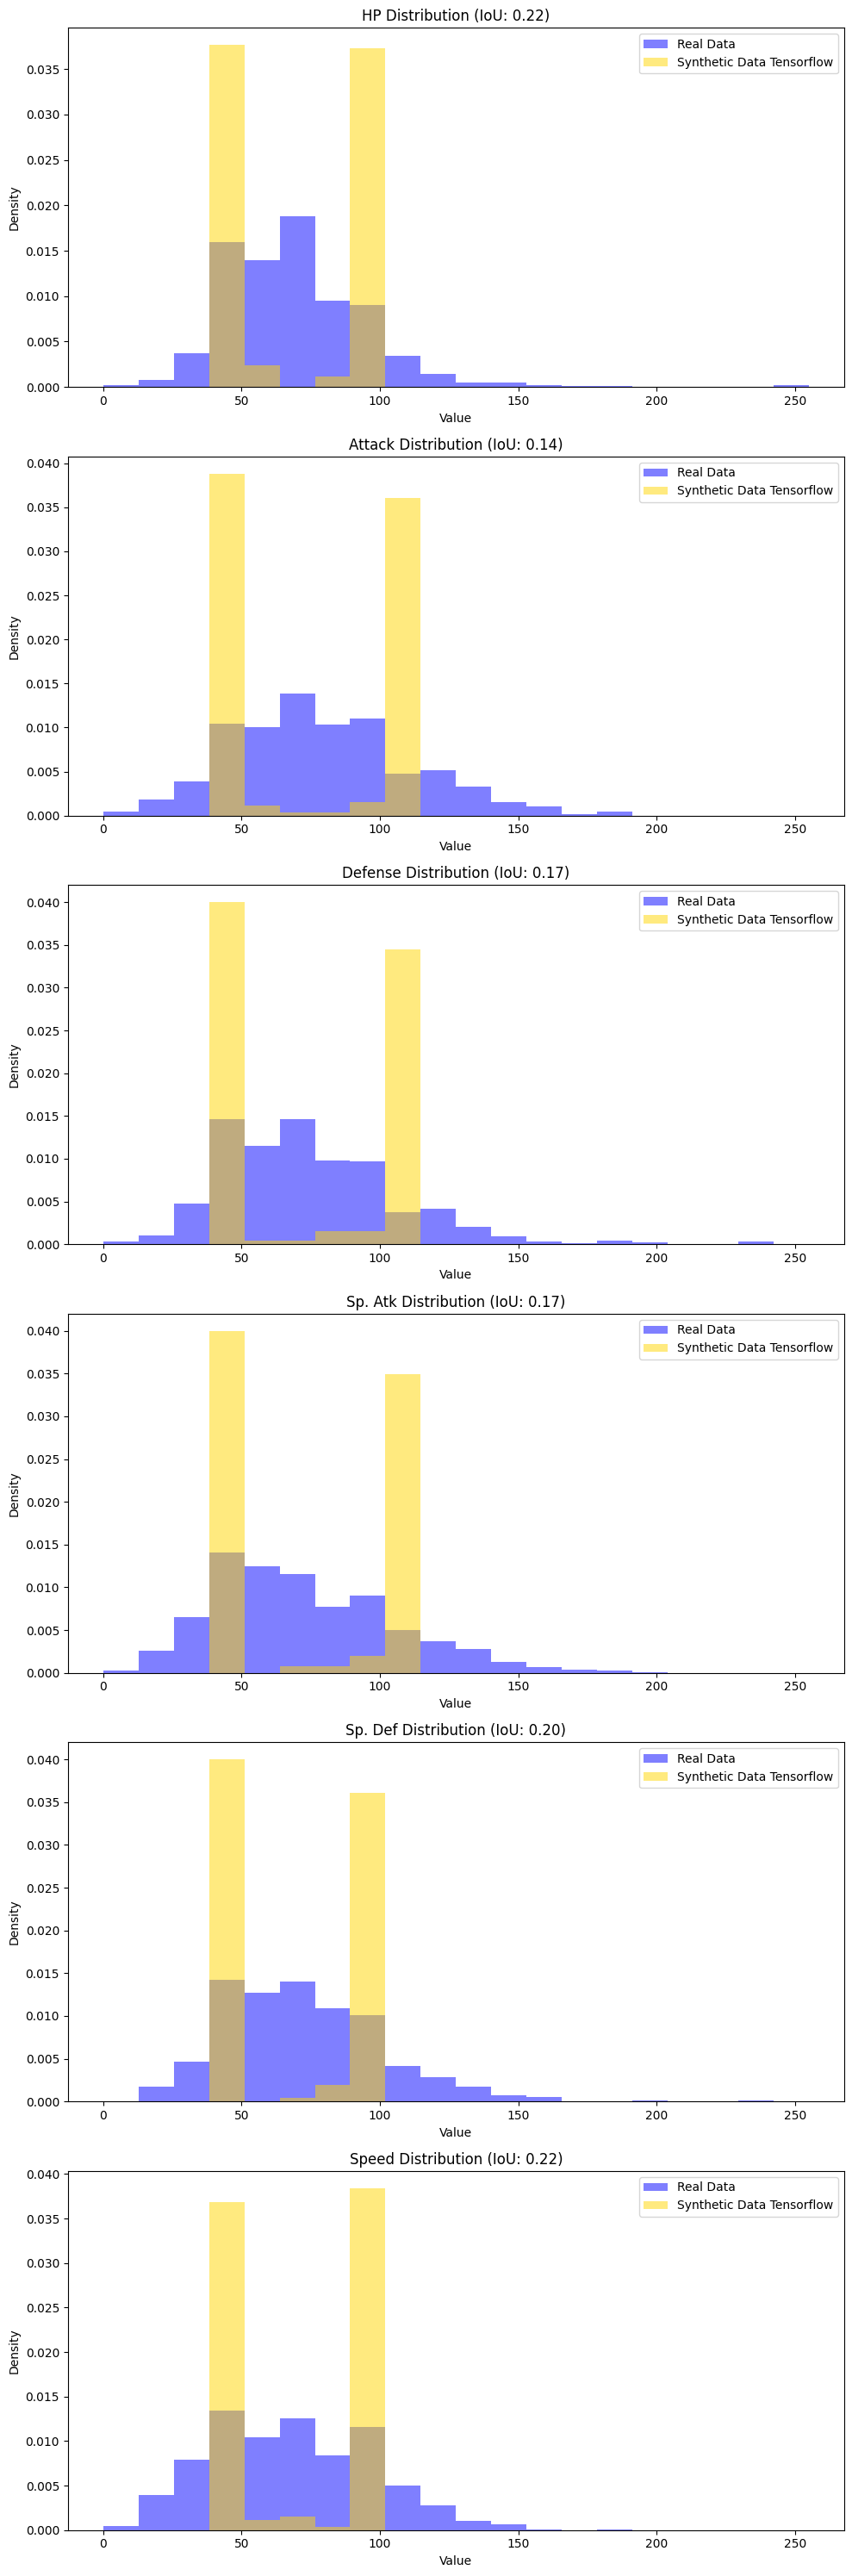

IoU for HP: 0.22
IoU for Attack: 0.14
IoU for Defense: 0.17
IoU for Sp. Atk: 0.17
IoU for Sp. Def: 0.20
IoU for Speed: 0.22


In [69]:
# TF
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_tf[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_tf_numeric = synthetic_tf[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_tf_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_tf_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_tf_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


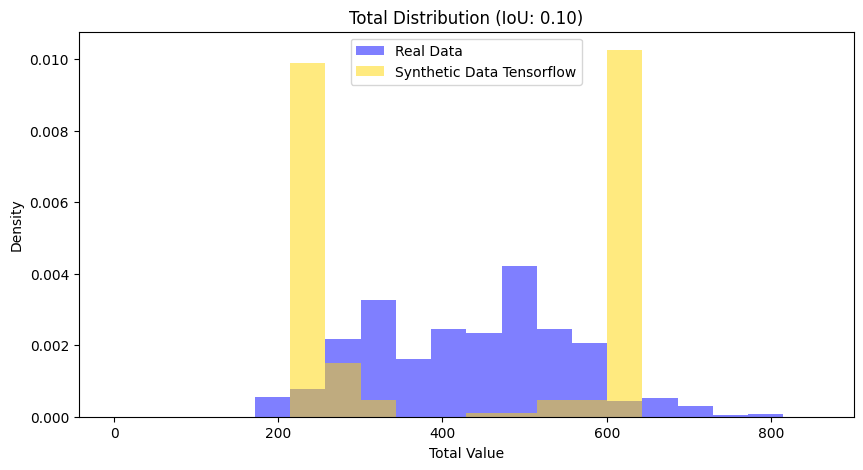

IoU for Total: 0.10


In [70]:
# TF
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_tf["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_tf["Total"], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')
